In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.datasets

In [3]:
from sklearn.datasets import load_iris
iris_data=load_iris()
print(iris_data.feature_names)
print(iris_data.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [4]:
data=pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [0]:
data['class']=iris_data.target

 1.data['class']=iris_data.target Use ID3 Algorithm to build a decision tree for a data set of your choice. Compute the depth of the tree. Using that Decision tree, compute the `class' of a given input. For computing the 'class' of a given input, you are not supposed to use any library function.


2.Build a Decision tree for a data set where all the input attributes are con- tinuous and the output attribute is categorical.

In [0]:
def entropy(attr):
    elements,counts = np.unique(attr,return_counts = True)
    entropy = np.sum([(counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy*(-1)

In [0]:
def InformationGain(data,attribute_name,target_name="class"):
    total_entropy = entropy(data[target_name])
    vals,counts= np.unique(data[attribute_name],return_counts=True)
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])

    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain

In [0]:
def ID3(data,raw_data,features,target_attribute="class",parent_node = None):
    
    if len(data)==0:
        most_common_target_value = np.unique(raw_data[target_attribute])[np.argmax(np.unique(raw_data[target_attribute],return_counts=True)[1])]
        return most_common_target_value

    elif len(np.unique(data[target_attribute])) <= 1:        
        return np.unique(data[target_attribute])[0]

    elif len(features) ==0:        
        most_common_target_value = np.unique(data[target_attribute])[np.argmax(np.unique(data[target_attribute],return_counts=True)[1])]
        return most_common_target_value
    
    else:        
        item_values = [InformationGain(data,feature,target_attribute) for feature in features] 
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        
        # tree --> root = max info gain
        tree = {best_feature:{}}
        features = [i for i in features if i != best_feature]
        # branch under the root for each possible value of the root node feature      
        for value in np.unique(data[best_feature]):
            #value = value
            # split based on largest information gain
            sub_data = data.where(data[best_feature] == value).dropna() #data.where: Replace values where the condition is False.
            # recursively call ID3
            subtree = ID3(sub_data,data,features,target_attribute,parent_node)
            # tree --> tree + sub-tree
            tree[best_feature][value] = subtree
            
        return(tree)    

In [0]:
training_data, testing_data = train_test_split(data, test_size=0.25,random_state=42)

In [10]:
from pprint import pprint
tree = ID3(training_data,training_data,list(training_data.columns[:-1]))
pprint(tree)

{'petal length (cm)': {1.1: 0.0,
                       1.2: 0.0,
                       1.3: 0.0,
                       1.4: 0.0,
                       1.5: 0.0,
                       1.6: 0.0,
                       1.7: 0.0,
                       1.9: 0.0,
                       3.0: 1.0,
                       3.3: 1.0,
                       3.5: 1.0,
                       3.7: 1.0,
                       3.8: 1.0,
                       3.9: 1.0,
                       4.0: 1.0,
                       4.1: 1.0,
                       4.2: 1.0,
                       4.3: 1.0,
                       4.4: 1.0,
                       4.5: {'sepal length (cm)': {4.9: 2.0,
                                                   5.4: 1.0,
                                                   5.6: 1.0,
                                                   6.0: 1.0}},
                       4.6: 1.0,
                       4.7: 1.0,
                       4.8: {'sepal length (cm)': {5.9: 1.0,


3. Build a Decision tree based on the pseudocode described in the `Introduc-
tion to Machine Learning- Ethen Alpaydin' (page 219 in the III edition).
Identify the conceptual difference (if any) between the ID3 Algorithm and
the pseudocode described in the book. You are required to execute the ID3
Algorithm and the pseudocode (as decsribed in the book) on the same data
set and compare the performance.

4. Implement a regression based learning model by building a decision tree
on a data set of your choice and predict the output for a given input. For
prediction, you are not supposed to use any library function.

In [0]:
import sklearn.datasets
diabetes = sklearn.datasets.load_diabetes()
data_b = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
data_b = pd.get_dummies(data_b,drop_first=True)
data_b['output']=diabetes.target
data_b = data_b.dropna()
data_training,data_testing = train_test_split(data_b,test_size=0.20,random_state=42)

In [0]:
def entropy(attr):
    elements,counts = np.unique(attr,return_counts = True)
    entropy = np.sum([(counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy*(-1)

In [0]:
def InformationGain(data,attribute_name,target_name="output"):
    total_entropy = entropy(data[target_name])
    vals,counts= np.unique(data[attribute_name],return_counts=True)
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])

    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain

In [0]:
def ID3(data,raw_data,features,target_attribute="output",parent_node = None):
    
    if len(data)==0:
        most_common_target_value = np.unique(raw_data[target_attribute])[np.argmax(np.unique(raw_data[target_attribute],return_counts=True)[1])]
        return most_common_target_value

    elif len(np.unique(data[target_attribute])) <= 1:        
        return np.unique(data[target_attribute])[0]

    elif len(features) ==0:        
        most_common_target_value = np.unique(data[target_attribute])[np.argmax(np.unique(data[target_attribute],return_counts=True)[1])]
        return most_common_target_value
    
    else:        
        item_values = [InformationGain(data,feature,target_attribute) for feature in features] 
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        
        # tree --> root = max info gain
        tree = {best_feature:{}}
        features = [i for i in features if i != best_feature]
        # branch under the root for each possible value of the root node feature      
        for value in np.unique(data[best_feature]):
            #value = value
            # split based on largest information gain
            sub_data = data.where(data[best_feature] == value).dropna() #data.where: Replace values where the condition is False.
            # recursively call ID3
            subtree = ID3(sub_data,data,features,target_attribute,parent_node)
            # tree --> tree + sub-tree
            tree[best_feature][value] = subtree
            
        return(tree)    

In [0]:
def predict(query,tree,default = 1):
    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
                result = tree[key][query[key]] 
            except:
                return default
            result = tree[key][query[key]]
            if isinstance(result,dict):
                return predict(query,result)
            else:
                return result

In [16]:
from pprint import pprint
tree = ID3(data_training,data_training,list(data_training.columns[:-1]))
pprint(tree)

{'s2': {-0.115613065979398: 40.0,
        -0.112794729823292: 152.0,
        -0.10089508827529: 281.0,
        -0.0971373067338155: 77.0,
        -0.0961978613484469: 137.0,
        -0.0958847128866574: 283.0,
        -0.0946321190394993: 151.0,
        -0.0905611890362353: 101.0,
        -0.082106180567918: 143.0,
        -0.0814798836443389: 114.0,
        -0.0811667351825494: 65.0,
        -0.0792878444118122: 97.0,
        -0.0786615474882331: 61.0,
        -0.078035250564654: 64.0,
        -0.0761563597939169: 178.0,
        -0.0755300628703378: 129.0,
        -0.0742774690231797: {'age': {-0.0890629393522603: 185.0,
                                      -0.0781653239992017: 142.0}},
        -0.072711726714232: {'age': {-0.099960554705319: 55.0,
                                     0.0489735217864827: 132.0}},
        -0.0717722813288634: 83.0,
        -0.0708328359434948: 70.0,
        -0.0695802420963367: 71.0,
        -0.0686407967109681: 84.0,
        -0.068014499787389: 85.0,

In [0]:
def accuracy_test(data,tree):
    queries = data.iloc[:,:-1].to_dict(orient = "records")
    predicted = pd.DataFrame(columns=["predicted"]) 
    #print(tree)
    for i in range(len(data)):
        predicted.loc[i,"predicted"] = predict(queries[i],tree,1.0) 
    predicted = predicted.reset_index(drop=True)
    data = data.reset_index(drop=True)
    #print(predicted)
    #print(data)
    print('Prediction accuracy: ',(np.sum(predicted["predicted"] == data["output"])/len(data))*100,'%')

In [18]:
accuracy_test(data_testing,tree)

Prediction accuracy:  0.0 %


5. Build a decision tree for a same data set using ID3 and CART algorithm and
record your observations on ID3 and CART(Classification And Regression
Tree) Algorithm.

In [19]:
from sklearn.datasets import load_iris
iris_data=load_iris()
print(iris_data.feature_names)
print(iris_data.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [20]:
data=pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
#CART

data['class']=iris_data.target
x=data.drop('class',axis=1)
y=data['class']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64

In [22]:
x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
x_train.shape,x_test.shape

((112, 4), (38, 4))

In [0]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=10,
    max_features=0.7,
    random_state=42
)

In [25]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=0.7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [26]:
x.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [0]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
dot_data=export_graphviz(
    classifier,out_file=None,
    feature_names=x.columns,
    filled=True,rounded=True,
    special_characters=True
)

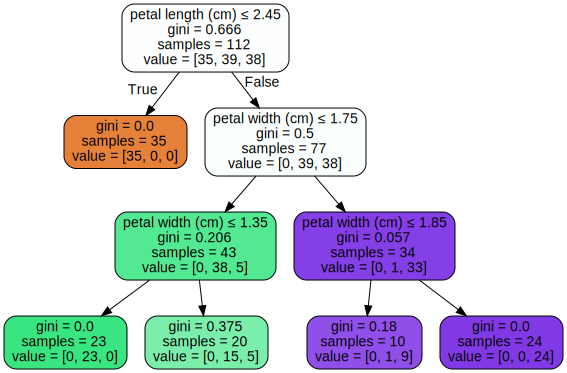

In [28]:
graph=graphviz.Source(dot_data)
graph

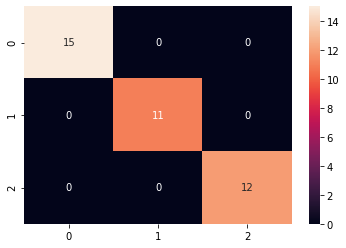

In [29]:
from sklearn.metrics import confusion_matrix
y_pred=classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',)

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
